In [1]:
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from hardwares.hardware_params import hardware_params


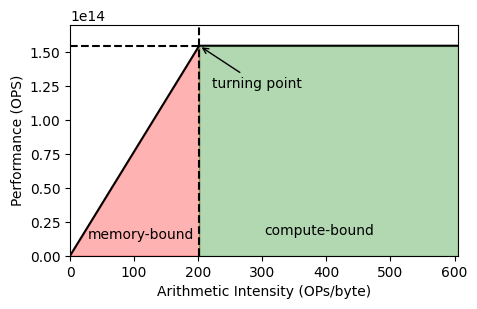

In [2]:
# bandwidth, FP16 MAC
def draw_roofline(bandwidth, max_OPS):
    # bandwidth is bytes/s
    # x axis is mac/byte
    # y axis is mac/s
    fig=plt.figure(figsize=(5, 3))
    y_max = max_OPS
    turning_point = y_max / bandwidth

    plt.plot(
        [0, turning_point, turning_point * 3], [0, y_max, y_max], color="black"
    )
    plt.xlabel("Arithmetic Intensity (OPs/byte)")
    plt.ylabel("Performance (OPS)")

    # left zone, red, right zone green (fill with rectangle), turning_point h_line vline
    plt.fill_between(
        [0, turning_point], [0, y_max], color="red", alpha=0.3, label="Memory Bound"
    )
    # text memory bound without arrow
    plt.text(turning_point * 0.55, y_max * 0.1, "memory-bound", ha="center", va="center")
    
    plt.fill_between(
        [turning_point,turning_point, turning_point * 3],
        [0,y_max, y_max],
        color="green",
        alpha=0.3,
        label="compute-bound",
    )
    # text compute bound without arrow
    plt.text(turning_point * 1.5, y_max * 0.1, "compute-bound")

    plt.hlines(y_max, 0, turning_point, color="black", linestyle="--")
    plt.vlines(turning_point, 0, y_max*2, color="black", linestyle="--")
    # annotate turning point
    plt.annotate(
        "turning point",
        xy=(turning_point, y_max),
        xytext=(turning_point * 1.1, y_max * 0.8),
        arrowprops=dict(arrowstyle="->"),
    )
    plt.ylim(0, y_max * 1.1)
    plt.xlim(0, turning_point * 3)
    

hardware="nvidia_A6000"
bandwidth = hardware_params[hardware]["bandwidth"]
max_OPS = hardware_params[hardware]["FP16"]
draw_roofline(bandwidth, max_OPS)
# save pdf
plt.savefig(f"../output/roofline_{hardware}.pdf", bbox_inches="tight")

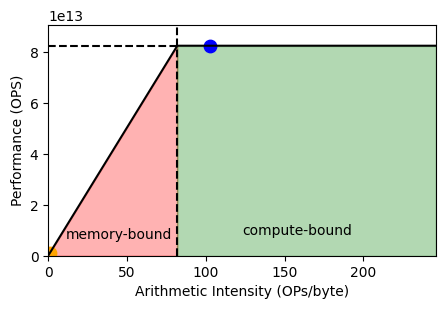

In [18]:
# opt-13b on RTX 4090 for qk_matmul operation
prefill = 102.4,82.6e12 # arithmetic_intensity,performance(throughput)
decode = 0.99,999e9 # arithmetic_intensity,performance(throughput)

# bandwidth, FP16 MAC
def draw_roofline(bandwidth, max_OPS):
    # bandwidth is bytes/s
    # x axis is mac/byte
    # y axis is mac/s
    fig=plt.figure(figsize=(5, 3))
    y_max = max_OPS
    turning_point = y_max / bandwidth

    plt.plot(
        [0, turning_point, turning_point * 3], [0, y_max, y_max], color="black"
    )
    plt.xlabel("Arithmetic Intensity (OPs/byte)")
    plt.ylabel("Performance (OPS)")

    # left zone, red, right zone green (fill with rectangle), turning_point h_line vline
    plt.fill_between(
        [0, turning_point], [0, y_max], color="red", alpha=0.3, label="Memory Bound"
    )
    # text memory bound without arrow
    plt.text(turning_point * 0.55, y_max * 0.1, "memory-bound", ha="center", va="center")
    
    plt.fill_between(
        [turning_point,turning_point, turning_point * 3],
        [0,y_max, y_max],
        color="green",
        alpha=0.3,
        label="compute-bound",
    )
    # text compute bound without arrow
    plt.text(turning_point * 1.5, y_max * 0.1, "compute-bound")

    plt.hlines(y_max, 0, turning_point, color="black", linestyle="--")
    plt.vlines(turning_point, 0, y_max*2, color="black", linestyle="--")
    # annotate turning point
    # plt.annotate(
    #     "turning point",
    #     xy=(turning_point, y_max),
    #     xytext=(turning_point * 1.1, y_max * 0.8),
    #     arrowprops=dict(arrowstyle="->"),
    # )
    plt.ylim(0, y_max * 1.1)
    plt.xlim(0, turning_point * 3)
    

hardware="nvidia_RTX_4090"
bandwidth = hardware_params[hardware]["bandwidth"]
max_OPS = hardware_params[hardware]["FP16"]
draw_roofline(bandwidth, max_OPS)

# Plot prefill and decode points
prefill_ai, prefill_perf = prefill
decode_ai, decode_perf = decode

# Plot points
plt.scatter(prefill_ai, prefill_perf, color='blue', s=80, marker='o', label='Prefill')
plt.scatter(decode_ai, decode_perf, color='orange', s=80, marker='o', label='Decode')

# Add annotations
# plt.annotate('Prefill', 
#              xy=(prefill_ai, prefill_perf), 
#              xytext=(prefill_ai * 1.1, prefill_perf * 1.1),
#              arrowprops=dict(arrowstyle="->"))
# plt.annotate('Decode', 
#              xy=(decode_ai, decode_perf), 
#              xytext=(decode_ai * 1.5, decode_perf * 1.5),
#              arrowprops=dict(arrowstyle="->"))

# Add legend
# plt.legend()

# save pdf
plt.savefig(f"../output/roofline_{hardware}.pdf", bbox_inches="tight")

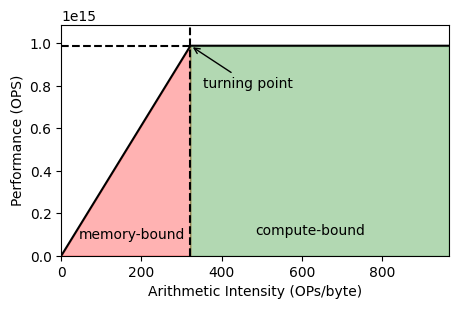

In [6]:
# bandwidth, FP16 MAC
def draw_roofline(bandwidth, max_OPS):
    # bandwidth is bytes/s
    # x axis is mac/byte
    # y axis is mac/s
    fig=plt.figure(figsize=(5, 3))
    y_max = max_OPS
    turning_point = y_max / bandwidth

    plt.plot(
        [0, turning_point, turning_point * 3], [0, y_max, y_max], color="black"
    )
    plt.xlabel("Arithmetic Intensity (OPs/byte)")
    plt.ylabel("Performance (OPS)")

    # left zone, red, right zone green (fill with rectangle), turning_point h_line vline
    plt.fill_between(
        [0, turning_point], [0, y_max], color="red", alpha=0.3, label="Memory Bound"
    )
    # text memory bound without arrow
    plt.text(turning_point * 0.55, y_max * 0.1, "memory-bound", ha="center", va="center")
    
    plt.fill_between(
        [turning_point,turning_point, turning_point * 3],
        [0,y_max, y_max],
        color="green",
        alpha=0.3,
        label="compute-bound",
    )
    # text compute bound without arrow
    plt.text(turning_point * 1.5, y_max * 0.1, "compute-bound")

    plt.hlines(y_max, 0, turning_point, color="black", linestyle="--")
    plt.vlines(turning_point, 0, y_max*2, color="black", linestyle="--")
    # annotate turning point
    plt.annotate(
        "turning point",
        xy=(turning_point, y_max),
        xytext=(turning_point * 1.1, y_max * 0.8),
        arrowprops=dict(arrowstyle="->"),
    )
    plt.ylim(0, y_max * 1.1)
    plt.xlim(0, turning_point * 3)
    

hardware="nvidia_H100"
bandwidth = hardware_params[hardware]["bandwidth"]
max_OPS = hardware_params[hardware]["FP16"]
draw_roofline(bandwidth, max_OPS)
# save pdf
plt.savefig(f"../output/roofline_{hardware}.pdf", bbox_inches="tight")

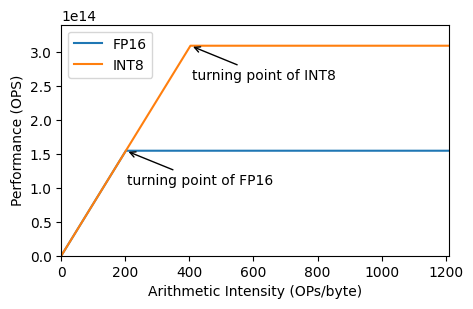

In [3]:

def draw_roofline(bandwidth, max_OPS,dtype):
    # bandwidth is bytes/s
    # x axis is mac/byte
    # y axis is mac/s
    
    y_max = max_OPS
    turning_point = y_max / bandwidth

    plt.plot(
        [0, turning_point, turning_point * 10], [0, y_max, y_max], label=dtype
    )
    
    plt.xlabel("Arithmetic Intensity (OPs/byte)")
    plt.ylabel("Performance (OPS)")
    plt.annotate(
        f"turning point of {dtype}",
        xy=(turning_point, y_max),
        xytext=(turning_point * 1.01, y_max -5e13),
        arrowprops=dict(arrowstyle="->"),
    )
    plt.ylim(0, y_max * 1.1)
    plt.xlim(0, turning_point * 3)
    

hardware="nvidia_A6000"
fig=plt.figure(figsize=(5, 3))
bandwidth = hardware_params[hardware]["bandwidth"]
max_OPS = hardware_params[hardware]["FP16"]
draw_roofline(bandwidth, max_OPS,"FP16")
draw_roofline(bandwidth, max_OPS*2,"INT8")
plt.legend()
# save pdf
plt.savefig(f"../output/quantization_roofline_{hardware}.pdf", bbox_inches="tight")

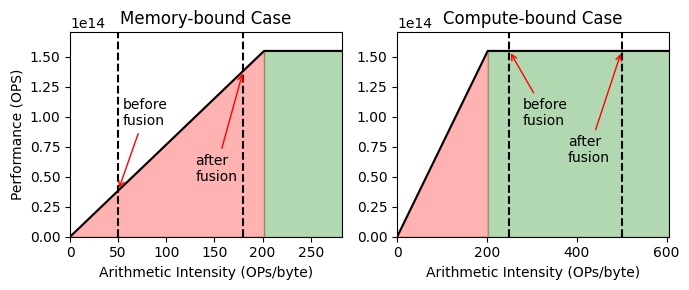

In [4]:
hardware="nvidia_A6000"
bandwidth = hardware_params[hardware]["bandwidth"]
max_OPS = hardware_params[hardware]["FP16"]

fig=plt.figure(figsize=(7, 3))
plt.subplot(1, 2, 1)
y_max = max_OPS
turning_point = y_max / bandwidth

plt.plot(
    [0, turning_point, turning_point * 3], [0, y_max, y_max], color="black"
)
plt.xlabel("Arithmetic Intensity (OPs/byte)")
plt.ylabel("Performance (OPS)")

plt.fill_between(
    [0, turning_point], [0, y_max], color="red", alpha=0.3, label="Memory Bound"
)

plt.fill_between(
    [turning_point,turning_point, turning_point * 3],
    [0,y_max, y_max],
    color="green",
    alpha=0.3,
    label="compute-bound",
)
plt.ylim(0, y_max * 1.1)
plt.xlim(0, turning_point * 1.4)

plt.vlines(50, 0, max_OPS*2, color="black", linestyle="--")
plt.annotate(
    "before\nfusion",
    xy=(50, max_OPS*(50/(max_OPS / bandwidth))),
    xytext=(55, max_OPS * 0.6),
    arrowprops=dict(arrowstyle="->", color="red"),
)

plt.vlines(180, 0, max_OPS*2, color="black", linestyle="--")
plt.annotate(
    "after\nfusion",
    xy=(180, max_OPS*(180/(max_OPS / bandwidth))),
    xytext=(130, max_OPS * 0.3),
    arrowprops=dict(arrowstyle="->", color="red"),
)
plt.title("Memory-bound Case")

plt.subplot(1, 2, 2)
plt.plot(
    [0, turning_point, turning_point * 3], [0, y_max, y_max], color="black"
)
plt.xlabel("Arithmetic Intensity (OPs/byte)")

plt.fill_between(
    [0, turning_point], [0, y_max], color="red", alpha=0.3, label="Memory Bound"
)

plt.fill_between(
    [turning_point,turning_point, turning_point * 3],
    [0,y_max, y_max],
    color="green",
    alpha=0.3,
    label="compute-bound",
)
plt.ylim(0, y_max * 1.1)
plt.xlim(0, turning_point * 3)
plt.vlines(250, 0, max_OPS*2, color="black", linestyle="--")
plt.annotate(
    "before\nfusion",
    xy=(250, y_max),
    xytext=(280, max_OPS * 0.6),
    arrowprops=dict(arrowstyle="->", color="red"),
)

plt.vlines(500, 0, max_OPS*2, color="black", linestyle="--")
plt.annotate(
    "after\nfusion",
    xy=(500, y_max),
    xytext=(380, max_OPS * 0.4),
    arrowprops=dict(arrowstyle="->", color="red"),
)
plt.title("Compute-bound Case")

plt.tight_layout()
# save pdf
plt.savefig(f"../output/roofline_operator_fusion.pdf", bbox_inches="tight")

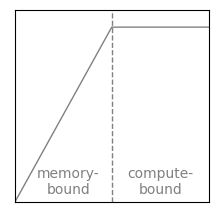

In [30]:
# bandwidth, FP16 MAC
def draw_roofline(bandwidth, max_OPS):
    # bandwidth is bytes/s
    # x axis is mac/byte
    # y axis is mac/s
    fig=plt.figure(figsize=(2.5, 2.5))
    y_max = max_OPS
    turning_point = y_max / bandwidth

    plt.plot(
        [0, turning_point, turning_point * 3], [0, y_max, y_max], color="gray", linewidth=1
    )
    # plt.fill_between(
    #     [0, turning_point], [0, y_max], color="red", alpha=0.3, label="Memory Bound"
    # )
    # text memory bound without arrow
    plt.text(turning_point * 0.55, y_max * 0.05, "memory-\nbound", ha="center",color="gray")
    
    # plt.fill_between(
    #     [turning_point,turning_point, turning_point * 3],
    #     [0,y_max, y_max],
    #     color="green",
    #     alpha=0.3,
    #     label="compute-bound",
    # )
    # text compute bound without arrow
    plt.text(turning_point * 1.5, y_max * 0.05, "compute-\nbound", ha="center",color="gray")

    # plt.hlines(y_max, 0, turning_point, color="black", linestyle="--")
    plt.vlines(turning_point, 0, y_max*2, color="gray", linestyle="--", linewidth=1)
    plt.ylim(0, y_max * 1.1)
    plt.xlim(0, turning_point * 2)
    # not show x ticks and y ticks
    plt.xticks([])
    plt.yticks([])

hardware="nvidia_A6000"
bandwidth = hardware_params[hardware]["bandwidth"]
max_OPS = hardware_params[hardware]["FP16"]
draw_roofline(bandwidth, max_OPS)
# save pdf
plt.savefig(f"../output/roofline_minimap.svg", bbox_inches="tight")